In [296]:
#Data
import pandas as pd
import numpy as np
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

df = pd.read_csv("/kaggle/input/dataset112/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [297]:
#Preprocessing Data
df.dropna(inplace = True)
df.drop(columns =['statezip'], inplace = True)
df.drop(columns =['country'], inplace = True)
df.drop(columns =['date'], inplace = True)


In [298]:
## Bỏ đi cột street và xử lí cột city
df = df.drop(columns=['street'])
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df = df.astype(int)  # Chuyển đổi toàn bộ DataFrame về kiểu int
print(df.head())


     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000         3          1         1340      7912       1           0   
1  2384000         5          2         3650      9050       2           0   
2   342000         3          2         1930     11947       1           0   
3   420000         3          2         2000      8030       1           0   
4   550000         4          2         1940     10500       1           0   

   view  condition  sqft_above  ...  city_SeaTac  city_Seattle  \
0     0          3        1340  ...            0             0   
1     4          5        3370  ...            0             1   
2     0          4        1930  ...            0             0   
3     0          4        1000  ...            0             0   
4     0          4        1140  ...            0             0   

   city_Shoreline  city_Skykomish  city_Snoqualmie  city_Snoqualmie Pass  \
0               1               0                0        

In [299]:
# Kiểm tra tầm quan trọng của các đặc trưng
importances = model.feature_importances_

# Tạo DataFrame để trực quan
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                    Feature  Importance
0               sqft_living    0.300290
3                waterfront    0.085180
29              city_Medina    0.076673
41          city_Snoqualmie    0.048770
39             city_Seattle    0.036562
11            city_Bellevue    0.033802
30       city_Mercer Island    0.031363
7             sqft_basement    0.030290
25                city_Kent    0.029901
9               city_Auburn    0.028132
22         city_Federal Way    0.027547
4                      view    0.026854
8                  yr_built    0.026298
5                 condition    0.024326
2                    floors    0.021634
36              city_Renton    0.021266
6                sqft_above    0.019043
26            city_Kirkland    0.017763
35             city_Redmond    0.016412
43         city_Woodinville    0.015851
23            city_Issaquah    0.014684
44        city_Yarrow Point    0.011646
42             city_Tukwila    0.010980
37           city_Sammamish    0.009682


In [300]:
# Gộp các thành phố ít quan trọng thành nhóm 'Others'
low_importance_cities = feature_importance_df[feature_importance_df['Importance'] < 0.002]['Feature'].tolist()

# Kiểm tra nếu các cột này có trong df
low_importance_cities = [col for col in low_importance_cities if col in df.columns]

# Tạo cột city_Others
df['city_Others'] = df[low_importance_cities].sum(axis=1)

# Loại bỏ các cột ít quan trọng
df.drop(columns=low_importance_cities, inplace=True)

# Loại bỏ thêm các đặc trưng không quan trọng
df.drop(['bedrooms', 'bathrooms', 'yr_renovated'], axis=1, inplace=True, errors='ignore')
df

,price,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,...,city_Sammamish,city_Seattle,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,city_Others
0,313000,1340,7912,1,0,0,3,1340,0,1955,...,0,0,0,0,0,0,0,0,0,1
1,2384000,3650,9050,2,0,4,5,3370,280,1921,...,0,1,0,0,0,0,0,0,0,0
2,342000,1930,11947,1,0,0,4,1930,0,1966,...,0,0,0,0,0,0,0,0,0,0
3,420000,2000,8030,1,0,0,4,1000,1000,1963,...,0,0,0,0,0,0,0,0,0,0
4,550000,1940,10500,1,0,0,4,1140,800,1976,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,1510,6360,1,0,0,4,1510,0,1954,...,0,1,0,0,0,0,0,0,0,0
4596,534333,1460,7573,2,0,0,3,1460,0,1983,...,0,0,0,0,0,0,0,0,0,0
4597,416904,3010,7014,2,0,0,3,3010,0,2009,...,0,0,0,0,0,0,0,0,0,0
4598,203400,2090,6630,1,0,0,3,1070,1020,1974,...,0,1,0,0,0,0,0,0,0,0


In [301]:
#Train model (XGB)
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Giả sử df là dataset đã được tiền xử lý
X = df.drop('price', axis=1)  # Loại bỏ cột price (target)
y = df['price']  # Cột price là target variable

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
# Khởi tạo mô hình XGBoost
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [303]:
training_data_prediction = model.predict(X_train)

In [304]:
print(training_data_prediction)

[679459.5  908709.56 681686.1  ... 280221.12 572197.4  451832.6 ]


In [305]:
# R Squared Error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9631324357535839
Mean Absolute Error: 50230.830517379094


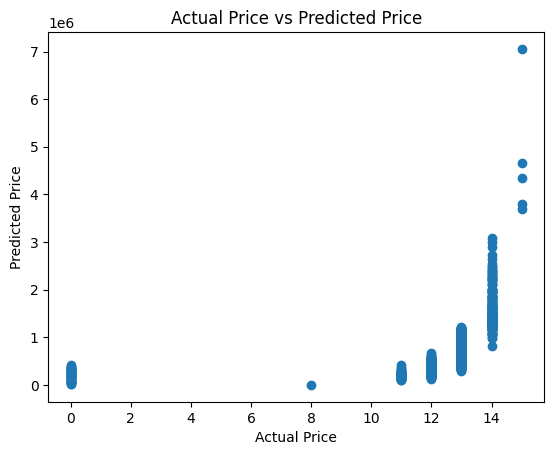

In [306]:

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [307]:
# Tính Accuracy (độ chính xác)
average_price = y_test.mean()
accuracy = (1 - (mae / average_price)) * 100
print(f'Accuracy of the model: {accuracy:.2f}%')


Accuracy of the model: 71.51%
